In [1]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
def minify(hostname):
    return hostname.split(".")[0]

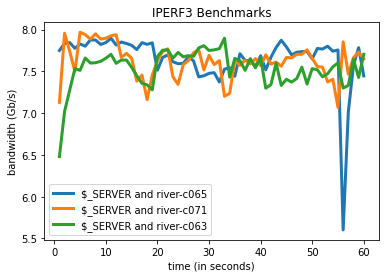

In [3]:
results_dir = '../results'
files = os.listdir(results_dir)
for file in files:
    if not file.endswith('.json'): continue
    with open(os.path.join(results_dir, file)) as f:
        results = json.load(f)

    seconds = []
    bandwidth = []

    for run in results["intervals"]:
        seconds.append(float(run["sum"]["end"]))
        bandwidth.append(float(run["sum"]["bits_per_second"])/(1000*1000*1000))

    plt.plot(seconds, bandwidth, markersize=10, linewidth=3.0, label=f"{minify(os.environ['SERVER'])} and {minify(file[:-5])}")
    

plt.xlabel('time (in seconds)')
plt.ylabel('bandwidth (Gb/s)')
plt.title('IPERF3 Benchmarks')
plt.legend()
plt.savefig(os.path.join(results_dir, './iperf-benchmarks.png'), dpi=300, bbox_inches='tight')
plt.show()